In [1]:
import pandas as pd
from BOCC import BOCC, load_clusters
import matplotlib.pyplot as plt
import networkx as nx
import os
import obonet
import pandas as pd
import typing
import numpy as np
import kneed

/Users/michael/miniconda3/envs/bocc/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.9) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
def remove_borders(ax, top=False, bottom=True, left=True, right=False):
    ax.spines['top'].set_visible(top)
    ax.spines['bottom'].set_visible(bottom)
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(right)

In [3]:
# load HPO
url = 'https://raw.githubusercontent.com/obophenotype/human-phenotype-ontology/master/hp.obo'
graph = obonet.read_obo(url)
print(graph.nodes(data=True)['HP:0001250']['name'])

Seizure


In [4]:
# G21 = nx.read_edgelist('../Edgelists/String_HPO_2021.phenotypic_branch.edgelist.txt')
G22 = nx.read_edgelist('../Edgelists/String_HPO_2022.phenotypic_branch.edgelist.txt')

# Load all the clusters
coms_dict = {}
for dir in os.listdir('../SubComs'):
    if dir in ['2022']:
        for f in os.listdir('../SubComs/{}'.format(dir)):
            if 'paris' in f:
                coms_dict[f.replace('.coms.txt','')] = load_clusters('../SubComs/{}/{}'.format(dir,f))

In [5]:
# load the HPO to Gene edges based on drug info
drug_edges = []
for line in open('../Resources/drug_edges.txt','r'):
    row = line.strip().split('\t')
    drug_edges.append(row)

In [6]:
if not os.path.exists('drug_gene_pheno_counts.theraputic.csv'):
    drug_df_t = pd.read_csv('../Resources/new_drug_edges_sampled.txt',sep='\t',header=None)
    drug_df_t.columns = ['hpo','gene','drug']
    drug_counts_dict_t = {'drug':list(drug_df_t['drug'].unique()),'hpo':[],'gene':[]}
    drug_counts_dict_t['gene'] = [ len(list(drug_df_t[drug_df_t['drug'] == d]['gene'].unique())) for d in drug_counts_dict_t['drug']]
    drug_counts_dict_t['hpo'] = [ len(list(drug_df_t[drug_df_t['drug'] == d]['hpo'].unique())) for d in drug_counts_dict_t['drug']]
    drug_counts_df_t = pd.DataFrame(drug_counts_dict_t)
else:
    drug_counts_df_t = pd.read_csv('drug_gene_pheno_counts.theraputic.csv')
print(drug_counts_df_t)

           drug  hpo  gene
0       C477819    2     1
1       D019307    1     1
2       C119129    3     1
3       C036423    1     7
4       D020001    1    20
..          ...  ...   ...
637     C016837    3    80
638     D015034    3     6
639     C017803    1     1
640     D019287    4    62
641  D000077211   16    26

[642 rows x 3 columns]


In [7]:
if not os.path.exists('drug_gene_pheno_counts.csv'):
    drug_df = pd.read_csv('../Resources/drug_edges.txt',sep='\t',header=None)
    drug_df.columns = ['hpo','gene','drug']
    drug_counts_dict = {'drug':list(drug_df['drug'].unique()),'hpo':[],'gene':[]}
    drug_counts_dict['gene'] = [ len(list(drug_df[drug_df['drug'] == d]['gene'].unique())) for d in drug_counts_dict['drug']]
    drug_counts_dict['hpo'] = [ len(list(drug_df[drug_df['drug'] == d]['hpo'].unique())) for d in drug_counts_dict['drug']]
    drug_counts_df = pd.DataFrame(drug_counts_dict)
else:
    drug_counts_df = pd.read_csv('drug_gene_pheno_counts.csv')
print(drug_counts_df)

          drug  hpo  gene
0      C534883   33     4
1      C534422   20     2
2      C496879   65     7
3      C553100   15     6
4      C013759    3     1
...        ...  ...   ...
11867  D015049   42     6
11868  C030940    4     1
11869  C510150   33     8
11870  D015054  329   155
11871  C015582    3     1

[11872 rows x 3 columns]


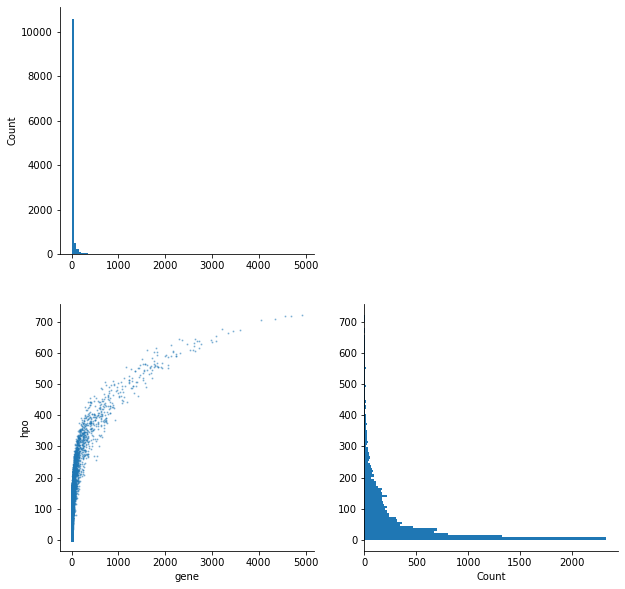

4.0
39.0
          drug  hpo  gene
5935   C015252    2     1
5284   C007711   13     1
5286   C032794    3     1
5291   C009264    2     1
5293   C048314    4     1
...        ...  ...   ...
1582   D000082  705  4046
11537  D014635  709  4340
10923  D013749  718  4554
2602   D001564  719  4700
2864   C006780  722  4929

[11872 rows x 3 columns]


In [8]:
drug_counts_df.to_csv('drug_gene_pheno_counts.csv',index=False)
def plot_scatter(df, x, y, name):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0, 0].hist(df[x],bins=100)
    ax[1, 0].scatter(df[x], df[y],s=1,alpha=.4)
    ax[1, 1].hist(df[y],orientation='horizontal',bins=100)
    ax[0, 1].axis('off')
    remove_borders(ax[0,0])
    remove_borders(ax[1,0])
    remove_borders(ax[1,1])
    ax[0,0].set_ylabel('Count')
    ax[1,1].set_xlabel('Count')
    ax[1,0].set_ylabel(y)
    ax[1,0].set_xlabel(x)
    plt.savefig(name)
    plt.show()
plot_scatter(drug_counts_df,'gene','hpo', '../Figures/ctd_drug_gene_hpo_scatter.png')
print(drug_counts_df['gene'].median())
print(drug_counts_df['hpo'].median())
print(drug_counts_df.sort_values('gene'))

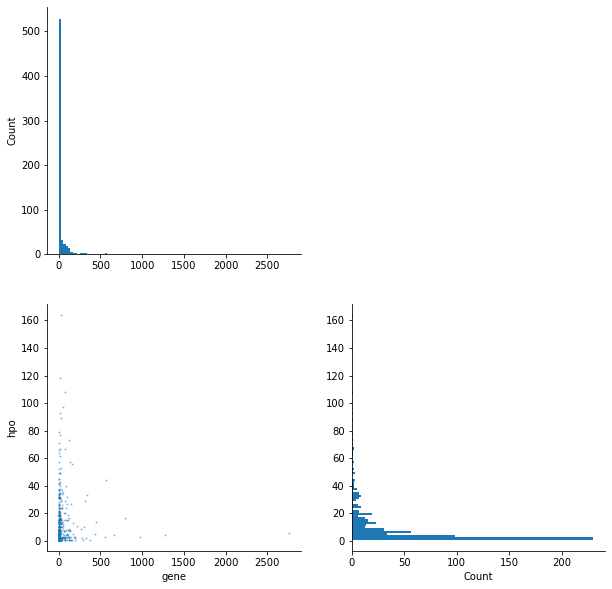

3.0
4.0
        drug  hpo  gene
0    C477819    2     1
349  C006552   14     1
347  C005134    1     1
342  D007538    1     1
340  D007529   10     1
..       ...  ...   ...
584  D013749    4   658
551  C017947   17   791
379  C025340    3   971
84   D001564    4  1273
105  C006780    6  2765

[642 rows x 3 columns]
           drug  hpo  gene
320     D006710    1     1
391     D008628    1    13
384     D008466    1     2
383     D008463    1     1
125     D002229    1     1
..          ...  ...   ...
521     D011794   93    14
337     D007213   97    45
206     D003907  108    77
493     D010936  118    13
529  D000077185  164    21

[642 rows x 3 columns]


In [9]:
drug_counts_df_t.to_csv('drug_gene_pheno_counts.theraputic.csv',index=False)

plot_scatter(drug_counts_df_t,'gene','hpo', '../Figures/ctd_drug_gene_hpo_scatter.theraputic.png')
print(drug_counts_df_t['gene'].median())
print(drug_counts_df_t['hpo'].median())
print(drug_counts_df_t.sort_values('gene'))
print(drug_counts_df_t.sort_values('hpo'))

In [10]:
# Create list of drug edges that do not already exist in the network
know_drug_edges = []
new_drug_edges = []
for edge in drug_edges:
    if G22.has_edge(edge[0],edge[1]):
        know_drug_edges.append(edge)
    else:
        new_drug_edges.append(edge)
print('Number of know drug edges',len(know_drug_edges))
print('Number of unknow drug edges',len(new_drug_edges))

Number of know drug edges 0
Number of unknow drug edges 24986447


## What is the distribution of drug degrees?

In [11]:
# number of drug edges per gene
print(drug_edges[:10])
g2ps = {}
for edge in drug_edges:
    if edge[1] not in g2ps:
        g2ps[edge[1]] = []
    g2ps[edge[1]].append(edge[0])
g2p_counts = { gene:len(g2ps[gene]) for gene in g2ps.keys()}

[['MESH:D006816', 'BCL2', 'C028098'], ['MESH:D006816', 'DDIT3', 'C028098'], ['MESH:D006816', 'MDM2', 'C028098'], ['MESH:D006816', 'CASP3', 'C028098'], ['MESH:D006816', 'BCL2L1', 'C028098'], ['MESH:D008113', 'BCL2', 'C028098'], ['MESH:D008113', 'DDIT3', 'C028098'], ['MESH:D008113', 'MDM2', 'C028098'], ['MESH:D008113', 'CASP3', 'C028098'], ['MESH:D008113', 'BCL2L1', 'C028098']]


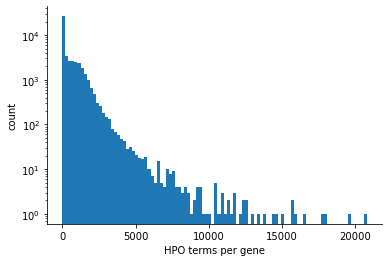

In [12]:
fig, ax = plt.subplots()
ax.hist(g2p_counts.values(),bins=100)
ax.set_yscale('log')
ax.set_ylabel('count')
ax.set_xlabel('HPO terms per gene')
remove_borders(ax)
plt.savefig('../Figures/ctd_gene2hpo_hist.png')
plt.show()

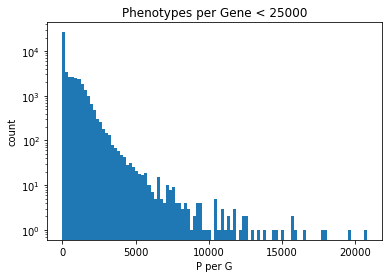

In [13]:
plt.hist([x for x in g2p_counts.values() if x < 25000],bins=100)
plt.yscale('log')
plt.title('Phenotypes per Gene < 25000')
plt.ylabel('count')
plt.xlabel('P per G')
plt.show()

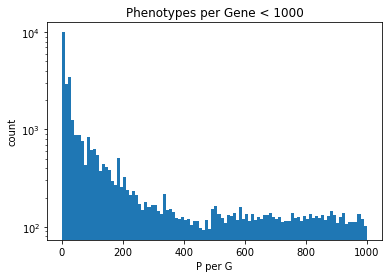

534.8240972623557
# > than 1000 9689
# < than 1000 37017
# < than 200 26053
46719


In [14]:
plt.hist([x for x in g2p_counts.values() if x < 1000],bins=100)
plt.yscale('log')
plt.title('Phenotypes per Gene < 1000')
plt.ylabel('count')
plt.xlabel('P per G')
plt.show()
print(sum(g2p_counts.values()) /len(g2p_counts))
print('# > than 1000',len([x for x in g2p_counts.values() if x > 1000]))
print('# < than 1000',len([x for x in g2p_counts.values() if x < 1000]))
print('# < than 200',len([x for x in g2p_counts.values() if x < 200]))
print(len(g2p_counts))

In [15]:
# number of edges < X
xs = [10,100,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000,3500,4000,5000,6000,7000,8000,9000,10000,12000,14000,16000,18000,20000,25000]
ys = []
y2s = []
for x in xs:
    values = [v for v in g2p_counts.values() if v < x]
    ys.append(sum(values)) 
    y2s.append(len(values))
 

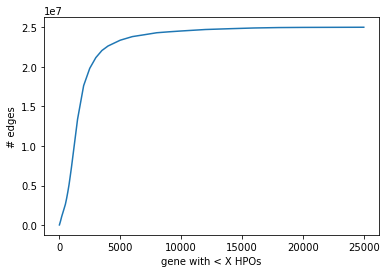

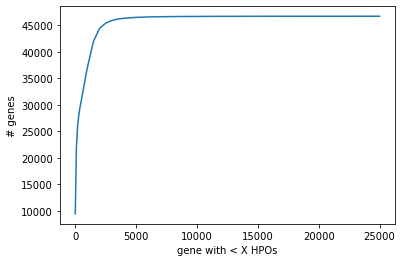

46719


In [16]:

plt.plot(xs,ys)
plt.ylabel('# edges')
plt.xlabel('gene with < X HPOs')
plt.show()

plt.plot(xs,y2s)
plt.ylabel('# genes')
plt.xlabel('gene with < X HPOs')
plt.show()

print(len(g2p_counts))


2500


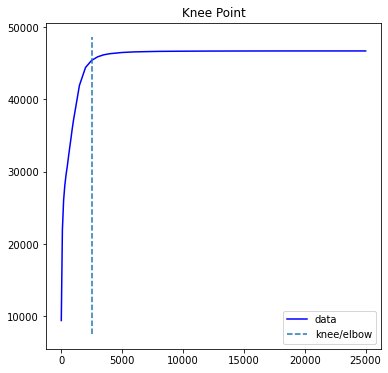

In [17]:
kl = kneed.KneeLocator(xs, y2s, curve="concave")
kl.plot_knee()
print(kl.knee)
plt.show()

10 39805 9415
100 517203 21924
150 811673 24332
200 1111456 26053
300 1613641 28113
400 2123226 29582
500 2639673 30729
600 3369741 32059
700 4201723 33339
800 5116592 34559
900 6209739 35845
1000 7321992 37017
1500 13380697 41956
2000 17621591 44428
2500 19801734 45411
3000 21152522 45908
3500 22051787 46187
4000 22618004 46339
5000 23348722 46504


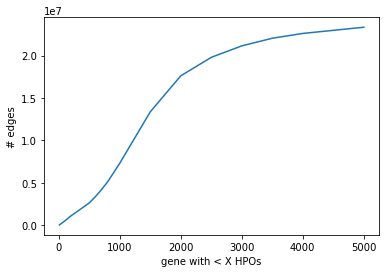

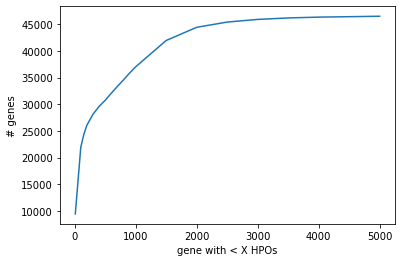

10 39805 9415
20 83507 12512
30 174053 16224
40 216438 17459
50 256983 18379
60 305636 19267
70 355025 20032
80 388760 20487
90 455410 21269
100 517203 21924
150 811673 24332
200 1111456 26053
300 1613641 28113
400 2123226 29582
500 2639673 30729


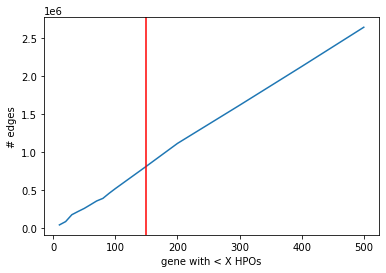

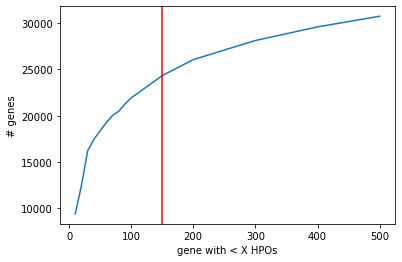

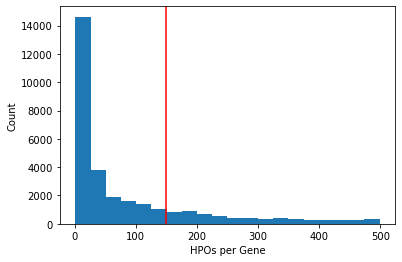

# novel < 150 811673
# known < 150 0
total 811673


In [18]:
xs = [10,100,150,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000,3500,4000,5000]
ys = []
y2s = []
for x in xs:
    values = [v for v in g2p_counts.values() if v < x]
    ys.append(sum(values)) 
    y2s.append(len(values))
    print(x, ys[-1], y2s[-1])
plt.plot(xs,ys)
plt.ylabel('# edges')
plt.xlabel('gene with < X HPOs')
plt.show()

plt.plot(xs,y2s)
plt.ylabel('# genes')
plt.xlabel('gene with < X HPOs')
plt.show()

xs = [10,20,30,40,50,60,70,80,90,100,150,200,300,400,500]
ys = []
y2s = []
for x in xs:
    values = [v for v in g2p_counts.values() if v < x]
    ys.append(sum(values)) 
    y2s.append(len(values))
    print(x, ys[-1], y2s[-1])
plt.plot(xs,ys)
plt.axvline(x=150,color='red')
plt.ylabel('# edges')
plt.xlabel('gene with < X HPOs')
plt.show()

plt.plot(xs,y2s)
plt.axvline(x=150,color='red')
plt.ylabel('# genes')
plt.xlabel('gene with < X HPOs')
plt.show()

plt.hist([v for v in g2p_counts.values() if v < 500],bins=20)
plt.axvline(x=150,color='red')
plt.xlabel('HPOs per Gene')
plt.ylabel('Count')
plt.show()


novel_ctd_150_edges = []
known_ctd_150_edges = []
total = 0
for g in g2ps.keys():
    if len(g2ps[g]) < 150:
        for h in g2ps[g]:
            total += 1
            if G22.has_edge(g, h):
                known_ctd_150_edges.append([g,h])
            else:
                novel_ctd_150_edges.append([g,h])
print('# novel < 150', len(novel_ctd_150_edges))
print('# known < 150', len(known_ctd_150_edges))
print('total',total)

In [19]:
# Plot the distribution of Ps to Gs in the 2022 g2p edge list
g2p_22_g2ps = {}
for line in open('../g2p_Edgelists/String_HPO_2022.phenotypic_branch.g2p_edgelist.txt','r'):
    row = line.strip().split('\t')
    if 'HP:' in row[0]:
        h = row[0]
        g = row[1]
    else:
        h = row[1]
        g = row[0]
    if g not in g2p_22_g2ps:
        g2p_22_g2ps[g] = []
    g2p_22_g2ps[g].append(h)
g2p_22_counts = { g:len(g2p_22_g2ps[g]) for g in g2p_22_g2ps.keys()}

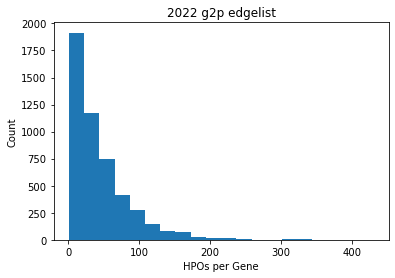

10 4086 919
20 15718 1717
30 31458 2360
40 49416 2884
50 70937 3370
60 87636 3676
70 103672 3926
80 118379 4124
90 131981 4286
100 146655 4442
150 183201 4747
200 200360 4849
300 208052 4883
400 209983 4889
500 210413 4890
600 210413 4890


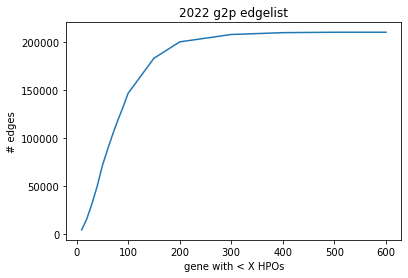

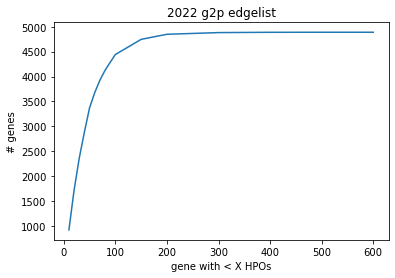

In [20]:
plt.hist(g2p_22_counts.values(),bins=20)
plt.title('2022 g2p edgelist')
plt.xlabel('HPOs per Gene')
plt.ylabel('Count')
plt.show()

xs = [10,20,30,40,50,60,70,80,90,100,150,200,300,400,500,600]
ys = []
y2s = []
for x in xs:
    values = [v for v in g2p_22_counts.values() if v < x]
    ys.append(sum(values)) 
    y2s.append(len(values))
    print(x, ys[-1], y2s[-1])
plt.plot(xs,ys)
plt.title('2022 g2p edgelist')
plt.ylabel('# edges')
plt.xlabel('gene with < X HPOs')
plt.show()

plt.plot(xs,y2s)
plt.title('2022 g2p edgelist')
plt.ylabel('# genes')
plt.xlabel('gene with < X HPOs')
plt.show()

In [21]:
uniq_g2p_values = {}
new_edges = []
with open('../Resources/drug_edges.unique.novel.txt','w') as outfile:
    for line in open('../Resources/drug_edges.unique.txt','r'):
        h,g = line.strip().split('\t')
        if not G22.has_edge(g,h):
            new_edges.append([g,h])
            outfile.write('{}\t{}\n'.format(g,h))
        if g not in uniq_g2p_values:
            uniq_g2p_values[g] = []
        uniq_g2p_values[g].append(h)
uniq_g2p_counts = { g:len(uniq_g2p_values[g]) for g in uniq_g2p_values.keys()}
print(len(new_edges))

ValueError: too many values to unpack (expected 2)

In [ ]:
plt.hist(uniq_g2p_counts.values(),bins=25)
plt.yscale('log')
plt.show()

## Figure for publication

In [ ]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(16, 5)

axes[0].hist(g2p_counts.values(),bins=100)
axes[0].set_yscale('log')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('HPO terms per gene')
axes[0].set_title('A', loc='left')
remove_borders(axes[0])

axes[1].hist([v for v in g2p_counts.values() if v < 500],bins=20)
axes[1].axvline(x=150,color='red', linestyle='--')
axes[1].set_title('B', loc='left')
axes[1].set_xlabel('HPO terms per gene')
axes[1].set_ylabel('Count')
remove_borders(axes[1])

axes[2].hist(g2p_22_counts.values(),bins=20)
axes[2].set_xlabel('HPO terms per gene')
axes[2].set_title('C', loc='left')
axes[2].set_ylabel('Count')
remove_borders(axes[2])

plt.savefig('../Figures/ctd_gene2hpo_vs_2022.png')
plt.show()

print(max(g2p_counts.values()))
print(max(g2p_22_counts.values()))
g2p_max = max(g2p_counts.values())
print([x for x in g2p_counts.keys() if g2p_counts[x] == g2p_max])

In [ ]:
# {101:['paris.censa.2021:1:SEMA4A,HP:0000128']} patient_id:list of ids of com this patient was solved by:gene,HPO
rediscovered_drug_interactions = []

# is this pid's pairs in any of the coms?
for pair in new_drug_edges:
    # for each community sets keys are in formatted like 'paris.cesna.2021'
    for k in coms_dict.keys():
        if '2022' not in k:
            continue
        for com in coms_dict[k]:
            if pair[0] in com.members and pair[1] in com.members:
                cluster_uid = '{cluster_set}:{cluster_id}'.format(cluster_set=k, cluster_id=str(com.name))
                res_string = '{pid} & {cluster_set}:{cluster_id} & {node1} & {node2} & {hpo_name} & {rank} \\\\'.format(cluster_set=k,
                                                                                                      cluster_id=str(com.name),
                                                                                                      node1=pair[0],
                                                                                                      node2=pair[1],
                                                                                                      hpo_name=graph.nodes(data=True)[pair[0]]['name'],
                                                                                                              #rank=com_percentile_map[cluster_uid],
                                                                                                              rank='TBD',
                                                                                                              pid=pair[2])
#                 print(res_string)
                rediscovered_drug_interactions.append(res_string)



print('Number of Rediscovered Drug Interactions', len(rediscovered_drug_interactions)) 



## Snowballing Results

In [ ]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(10, 10)
ax_labels = [['A','B'],['C','D']]
for i,f in enumerate(os.listdir('../DrugRediscoveryResults/')):
    x = int(i/2)
    y = i % 2
    tmp_df = pd.read_csv('../DrugRediscoveryResults/' + f,sep='\t',header=None)
    tmp_df.columns = ['cid','pvalue']
#     print(tmp_df)
    sub = tmp_df[tmp_df['pvalue'] < 1]
    print(f.split('.')[2:4])
    print(sum(tmp_df['pvalue'] == 1) / tmp_df.shape[0])
    leq_1 = sum(tmp_df['pvalue'] != 1)
    axes[x,y].hist(sub['pvalue'])
    axes[x,y].set_xlabel('p-value')
    axes[x,y].set_ylabel('count')
    axes[x,y].set_title(ax_labels[x][y] + '                       ' + '.'.join(f.split('.')[2:4]) + ' n={}'.format(str(leq_1)),loc='left')
    remove_borders(axes[x,y])
plt.show()

# Load the old erronious results
fig, axes = plt.subplots(2,2)
fig.set_size_inches(10, 10)
ax_labels = [['A','B'],['C','D']]
for i,f in enumerate(os.listdir('../DrugRediscoveryResults-OLD/')):
    print(f)
    x = int(i/2)
    y = i % 2
    tmp_df = pd.read_csv('../DrugRediscoveryResults-OLD/' + f,sep='\t',header=None)
    tmp_df.columns = ['cid','pvalue']
#     print(tmp_df)
    sub = tmp_df[tmp_df['pvalue'] < 1]
    print(f.split('.')[2:4])
    print(sum(tmp_df['pvalue'] == 1) / tmp_df.shape[0])
    leq_1 = sum(tmp_df['pvalue'] != 1)
    axes[x,y].hist(sub['pvalue'])
    axes[x,y].set_xlabel('p-value')
    axes[x,y].set_ylabel('count')
    axes[x,y].set_title(ax_labels[x][y] + '         ERROR              ' + '.'.join(f.split('.')[2:4]) + ' n={}'.format(str(leq_1)),loc='left')
    remove_borders(axes[x,y])
plt.show()

## Non-1 P-values vs Cluster Rank

In [22]:
predicted_df_22 = pd.read_csv('../xgb_cluster_rankings_2022.tsv',sep='\t')
predicted_df_22['percentile'] = [
    sum(predicted_df_22['estimated_snowballing_pvalue'] <= x)/predicted_df_22.shape[0] 
    for x in predicted_df_22['estimated_snowballing_pvalue']]

com_score_map_22 = {r[['clusterID']].values[0]:r[['estimated_snowballing_pvalue']].values[0] for i,r in predicted_df_22.iterrows()}
com_percentile_map_22 = {r[['clusterID']].values[0]:round(r[['percentile']].values[0], 2) for i,r in predicted_df_22.iterrows()}

print(predicted_df_22['clusterID'])

0             paris.cesna.2022:4
1             paris.cesna.2022:5
2            paris.cesna.2022:26
3            paris.cesna.2022:27
4            paris.cesna.2022:40
                  ...           
2759    paris.walktrap.2022:1981
2760    paris.walktrap.2022:1983
2761    paris.walktrap.2022:2026
2762    paris.walktrap.2022:2033
2763    paris.walktrap.2022:2034
Name: clusterID, Length: 2764, dtype: object


/var/folders/ty/694s8g7n1cz_l5s3prx55jzr0000gn/T/ipykernel_9698/3831751162.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['percentile'] = [ com_percentile_map_22[x] for x in sub['uid']]


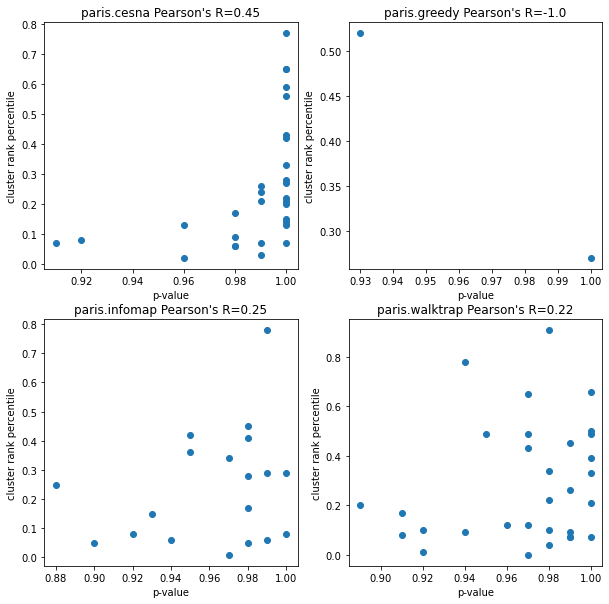

In [23]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(10, 10)
for i,f in enumerate(os.listdir('../DrugRediscoveryResults/')):
    name = '{}.{}.{}:{}'.format(f.split('.')[2],f.split('.')[3],f.split('.')[4].split('_')[2],'')
#     print(name)
    x = int(i/2)
    y = i % 2
    tmp_df = pd.read_csv('../DrugRediscoveryResults/' + f,sep='\t',header=None)
    tmp_df.columns = ['cid','pvalue']
    tmp_df['uid'] = [name + str(x) for x in tmp_df['cid']]
    tmp_df['pvalue'] = [1-x for x in tmp_df['pvalue']]
    sub = tmp_df[tmp_df['pvalue'] > 0]
    sub['percentile'] = [ com_percentile_map_22[x] for x in sub['uid']]
    pearsons_R = sub['pvalue'].corr(sub['percentile'])
    axes[x,y].scatter(sub['pvalue'], sub['percentile'])
    axes[x,y].set_xlabel('p-value')
    axes[x,y].set_ylabel('cluster rank percentile')
    axes[x,y].set_title('.'.join(f.split('.')[2:4]) + " Pearson's R=" + str(round(pearsons_R, 2)))
#     print()
plt.show()